In [3]:
##################### Python 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
import numpy as np
import os
import datetime
import dcor
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
import os
os.chdir('/Users/sss/Desktop/Data')
os.getcwd()
from IPython.core.display import display, HTML
#display(HTML("<style>.container { width: 60% !important; }</style>"))
plt.rcParams['font.family'] = 'AppleGothic'
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'



In [4]:
# !pip install openpyxl

In [5]:
# pip install openpyxl


In [71]:
df = pd.read_csv("VIX_History.csv")


In [73]:
df

,DATE,CLOSE
0,1/2/90,17.24
1,1/3/90,18.19
2,1/4/90,19.22
3,1/5/90,20.11
4,1/8/90,20.26
...,...,...
8635,3/28/24,13.01
8636,4/1/24,13.65
8637,4/2/24,14.61
8638,4/3/24,14.33


In [76]:
df['DATE'] = pd.to_datetime(df['DATE'])
# df = df.set_index('DATE')
df

,CLOSE
DATE,
1990-01-02,17.24
1990-01-03,18.19
1990-01-04,19.22
1990-01-05,20.11
1990-01-08,20.26
...,...
2024-03-28,13.01
2024-04-01,13.65
2024-04-02,14.61


In [38]:
df.describe()

,CLOSE
count,8640.000000
mean,19.538076
std,7.893097
min,9.140000
25%,13.840000
50%,17.690000
75%,22.940000
max,82.690000


In [39]:
df.shape

(8640, 2)

In [40]:
df

,DATE,CLOSE
0,1/2/90,17.24
1,1/3/90,18.19
2,1/4/90,19.22
3,1/5/90,20.11
4,1/8/90,20.26
...,...,...
8635,3/28/24,13.01
8636,4/1/24,13.65
8637,4/2/24,14.61
8638,4/3/24,14.33


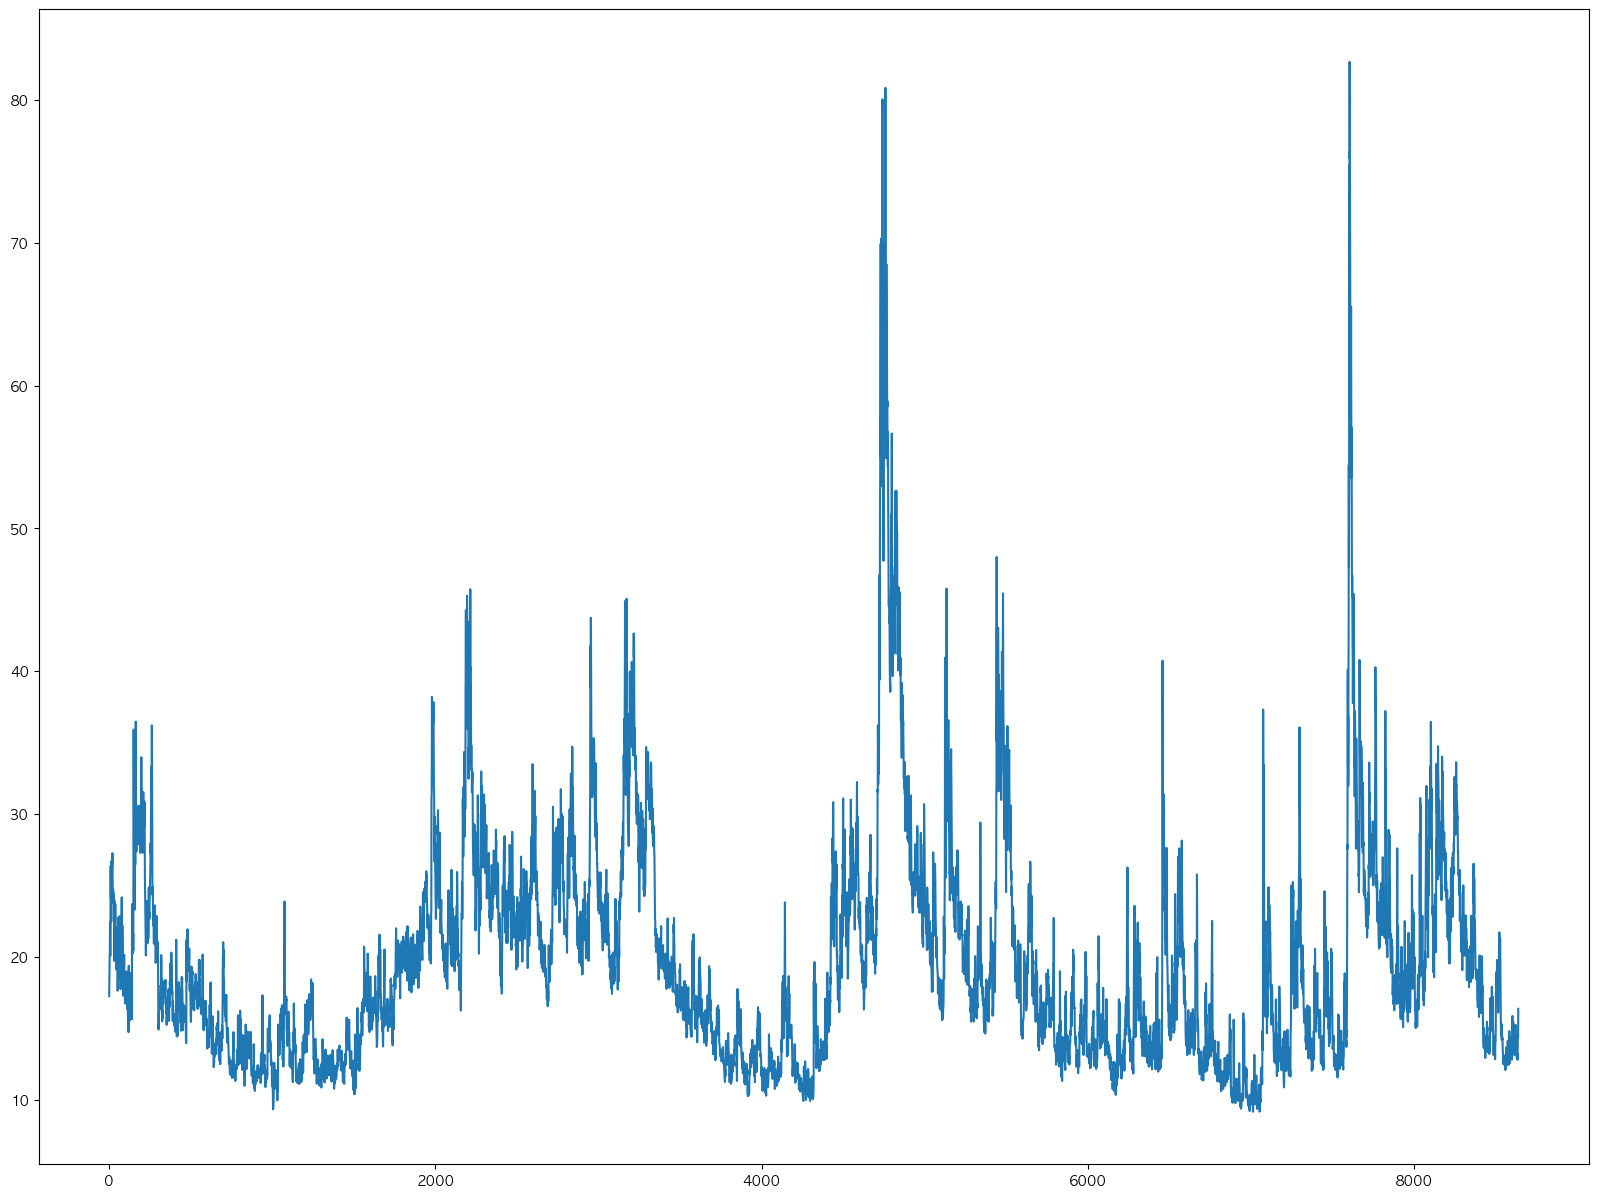

In [41]:
plt.plot(df.index, df['CLOSE'])

plt.gcf().set_size_inches(20,15)

In [68]:
# df = df.reset_index()

In [43]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.stattools import adfuller 

In [44]:
df

,DATE,CLOSE
0,1/2/90,17.24
1,1/3/90,18.19
2,1/4/90,19.22
3,1/5/90,20.11
4,1/8/90,20.26
...,...,...
8635,3/28/24,13.01
8636,4/1/24,13.65
8637,4/2/24,14.61
8638,4/3/24,14.33


In [45]:
adfuller(df['CLOSE'])

(-6.928323650589618,
 1.1005551282722604e-09,
 10,
 8629,
 {'1%': -3.431108053814755,
  '5%': -2.8618750088316998,
  '10%': -2.5669483202607704},
 32536.883656954353)

In [46]:
from statsmodels.tsa.stattools import acf, pacf

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [49]:
# df = df.set_index('DATE')
df

,CLOSE
DATE,
1/2/90,17.24
1/3/90,18.19
1/4/90,19.22
1/5/90,20.11
1/8/90,20.26
...,...
3/28/24,13.01
4/1/24,13.65
4/2/24,14.61


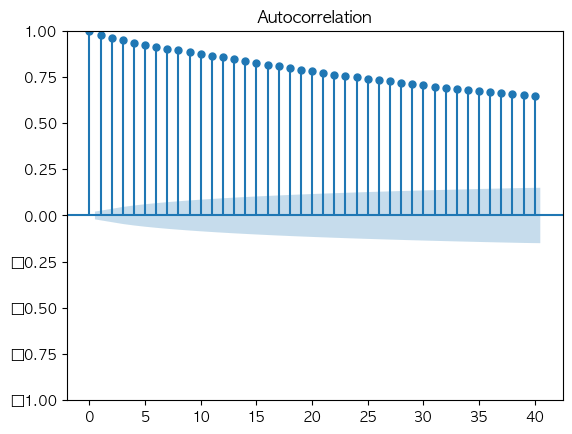

In [50]:
plot_acf(df)
plt.show()

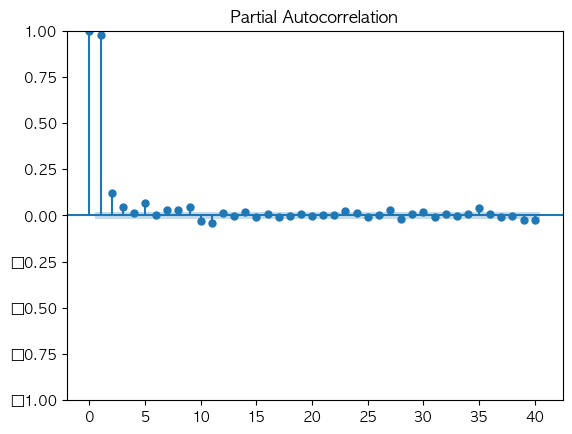

In [51]:
plot_pacf(df)
plt.show()

In [52]:
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    result = adfuller(data.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('num of lags: %f' % result[2])
    print('num of observations: %f' % result[3])
    print('Critical values:')
    for k, v in result[4].items():
        print('\t%s: %.3f' % (k,v))

print('ADF TEST 결과')
adf_test(df)

ADF TEST 결과
ADF Statistics: -6.928324
p-value: 0.000000
num of lags: 10.000000
num of observations: 8629.000000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [77]:
df_d1 = df.diff().dropna()

<Axes: xlabel='DATE'>

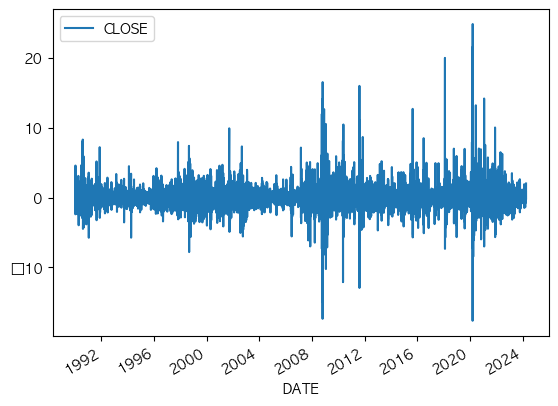

In [78]:
df_d1.plot()

In [79]:
adfuller(df_d1)

(-19.101226501368693,
 0.0,
 33,
 8605,
 {'1%': -3.431110168715755,
  '5%': -2.8618759433562184,
  '10%': -2.5669488177150632},
 32572.47450837388)

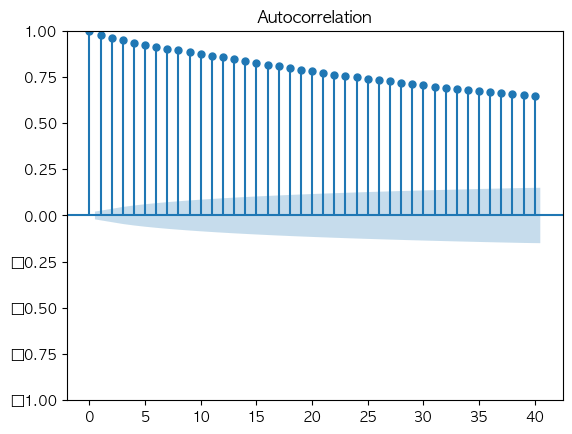

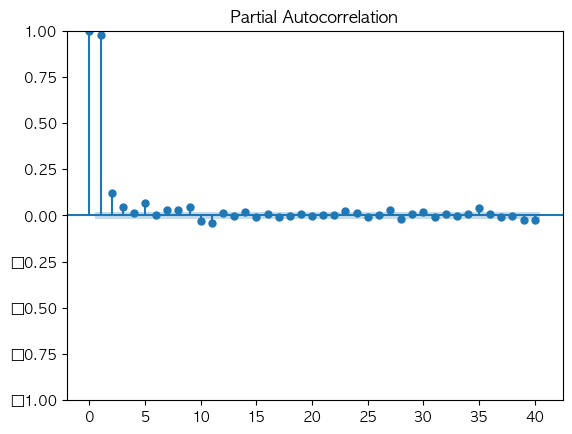

In [80]:
plot_acf(df)
plt.show()

plot_pacf(df)
plt.show()

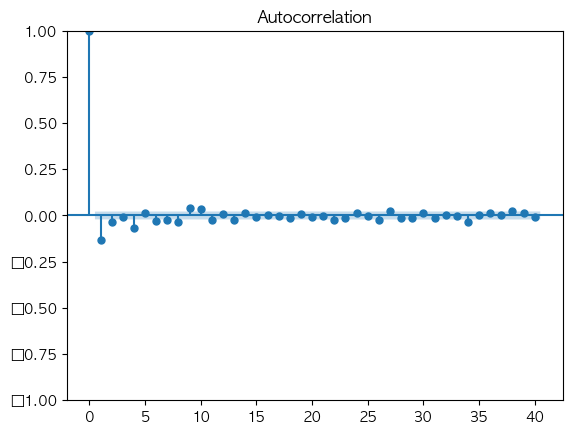

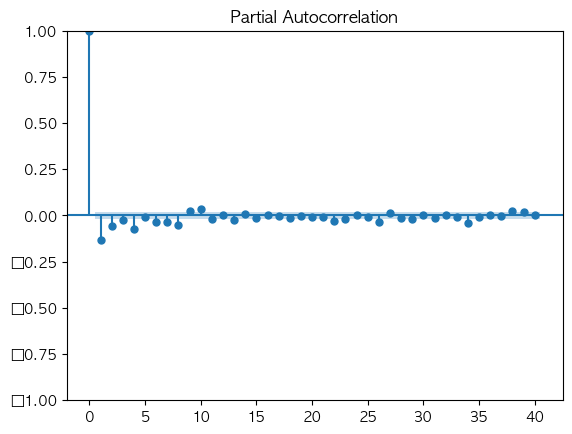

In [81]:
plot_acf(df_d1)
plt.show()

plot_pacf(df_d1)
plt.show()

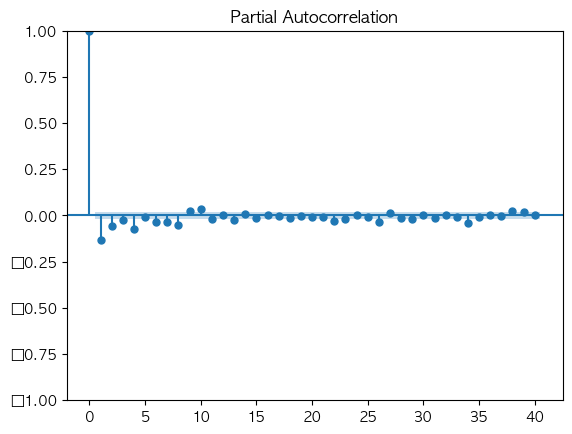

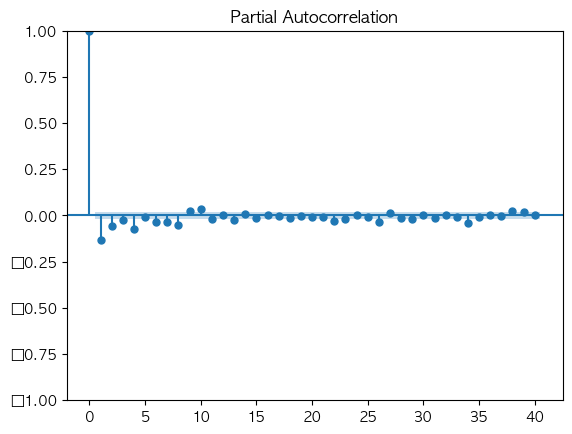

In [82]:
plot_pacf(df_d1)

In [83]:
# # ▶ Best score 기준 모델 학습
# mod = sm.tsa.statespace.SARIMAX(df,
#                                 order=(0,1,1),
#                                 seasonal_order=(0,1,1,12),
#                                 enforce_stationarity=False,
#                                 enforce_invertibility=False)
# results = mod.fit()
# print(results.summary().tables[1])

In [84]:
import statsmodels.api as sm

In [85]:
df

,CLOSE
DATE,
1990-01-02,17.24
1990-01-03,18.19
1990-01-04,19.22
1990-01-05,20.11
1990-01-08,20.26
...,...
2024-03-28,13.01
2024-04-01,13.65
2024-04-02,14.61


In [135]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1,1,1),
                                seasonal_order = (1,1,1,12),
                                enforce_stationarity = False,
                                enforce_invertibility = False)

results = mod.fit()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.02937D+00    |proj g|=  1.81593D-01


 This problem is unconstrained.



At iterate    5    f=  1.89537D+00    |proj g|=  3.20322D-02

At iterate   10    f=  1.89470D+00    |proj g|=  2.91289D-03

At iterate   15    f=  1.89461D+00    |proj g|=  2.04702D-02

At iterate   20    f=  1.89456D+00    |proj g|=  1.56522D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     35      1     0     0   1.256D-05   1.895D+00
  F =   1.8945614181494412     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [136]:
results = mod.fit()
print(result.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.02937D+00    |proj g|=  1.81593D-01


 This problem is unconstrained.



At iterate    5    f=  1.89537D+00    |proj g|=  3.20322D-02

At iterate   10    f=  1.89470D+00    |proj g|=  2.91289D-03

At iterate   15    f=  1.89461D+00    |proj g|=  2.04702D-02

At iterate   20    f=  1.89456D+00    |proj g|=  1.56522D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     35      1     0     0   1.256D-05   1.895D+00
  F =   1.8945614181494412     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.

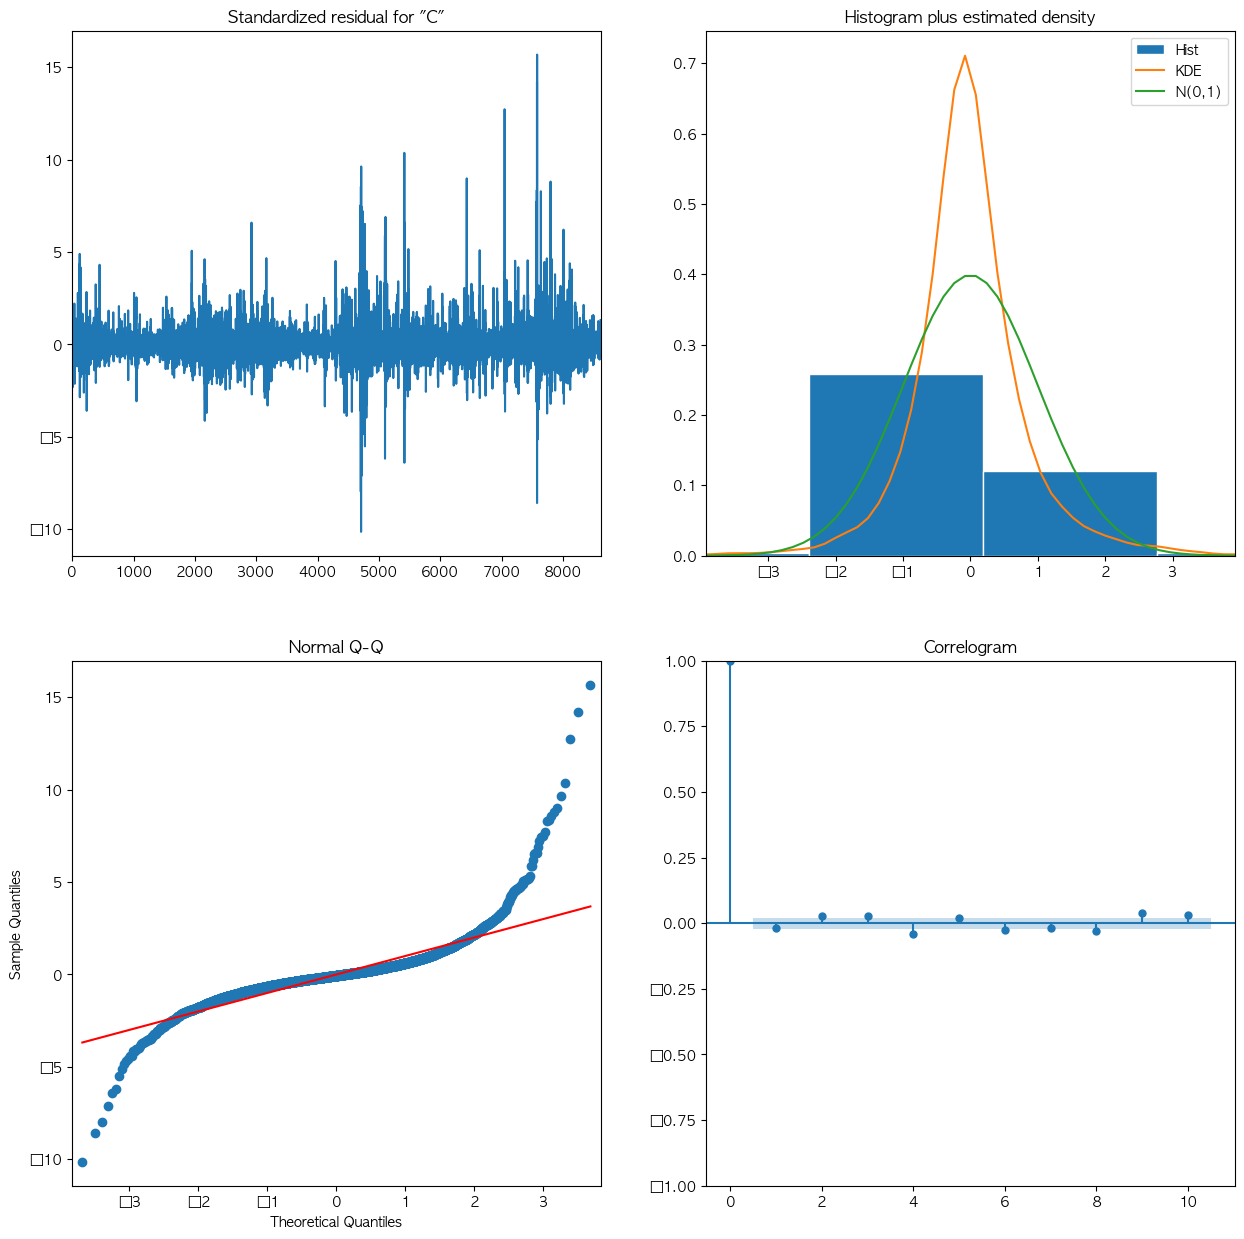

In [137]:
result.plot_diagnostics(figsize=(15,15))
plt.show()

In [139]:
df

,CLOSE
DATE,
1990-01-02,17.24
1990-01-03,18.19
1990-01-04,19.22
1990-01-05,20.11
1990-01-08,20.26
...,...
2024-03-28,13.01
2024-04-01,13.65
2024-04-02,14.61


<Axes: xlabel='DATE'>

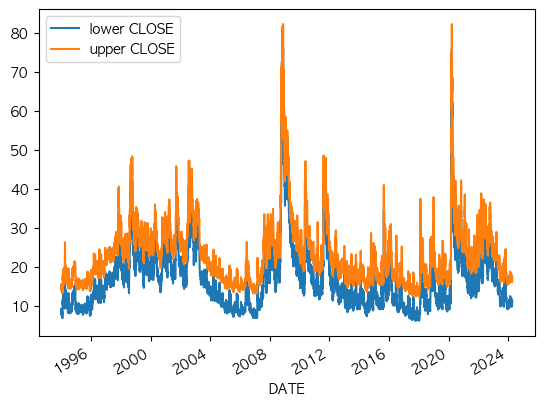

In [111]:
df_check = pred.conf_int()
df_check


df_check = df_check.loc['1994':] 
df_check.plot()

In [127]:
pred_ci = pred.conf_int()
pred_ci = pred_ci.loc['1994':]
pred_ci

,lower CLOSE,upper CLOSE
DATE,,
1994-01-03,8.273631,14.629291
1994-01-04,9.171457,15.527113
1994-01-05,8.733477,15.089131
1994-01-06,7.700816,14.056469
1994-01-07,8.221408,14.577061
...,...,...
2024-03-28,9.743595,16.066239
2024-04-01,9.804700,16.127343
2024-04-02,10.497437,16.820081


In [131]:
pred_ci.iloc[:,1]

DATE
1994-01-03    14.629291
1994-01-04    15.527113
1994-01-05    15.089131
1994-01-06    14.056469
1994-01-07    14.577061
                ...    
2024-03-28    16.066239
2024-04-01    16.127343
2024-04-02    16.820081
2024-04-03    17.604453
2024-04-04    17.383041
Name: upper CLOSE, Length: 7628, dtype: float64

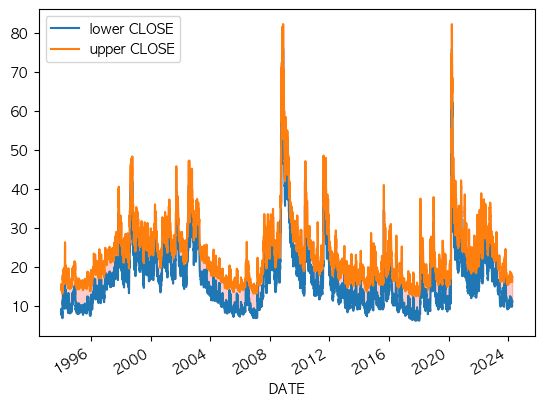

In [128]:
ax = df_check.plot()
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='red', alpha=0.2)

In [123]:
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.2)

In [163]:
df_check.iloc[6000:]

,lower CLOSE,upper CLOSE
DATE,,
2017-11-02,7.054054,13.377659
2017-11-03,6.964359,13.287965
2017-11-06,6.160203,12.483809
2017-11-07,6.324997,12.648602
2017-11-08,6.677029,13.000635
...,...,...
2024-03-28,9.743595,16.066239
2024-04-01,9.804700,16.127343
2024-04-02,10.497437,16.820081


In [180]:
#################################################################################################################
#--------------- start=pd.to_datetime(        ) ----------------------------------------------------------------#
#--------------- 예측을 시작 및 종료하고 싶은 날짜를 빈칸에 입력함 ---------------------------------------------#
#--------------- ex) 2017-01-01 --------------------------------------------------------------------------------#
pred = results.get_prediction(start=pd.to_datetime('2017-01-03'), end=pd.to_datetime('2024-04-04'), dynamic=False)
#################################################################################################################

pred_ci = pred.conf_int()

pred_ci

,lower CLOSE,upper CLOSE
DATE,,
2017-01-03,10.688399,17.012169
2017-01-04,9.640137,15.963907
2017-01-05,8.795287,15.119057
2017-01-06,8.694572,15.018342
2017-01-09,8.369898,14.693662
...,...,...
2024-03-28,9.743595,16.066239
2024-04-01,9.804700,16.127343
2024-04-02,10.497437,16.820081


In [181]:
results

In [182]:
pred.predicted_mean


DATE
2017-01-03    13.850284
2017-01-04    12.802022
2017-01-05    11.957172
2017-01-06    11.856457
2017-01-09    11.531780
                ...    
2024-03-28    12.904917
2024-04-01    12.966022
2024-04-02    13.658759
2024-04-03    14.443131
2024-04-04    14.221719
Name: predicted_mean, Length: 1839, dtype: float64

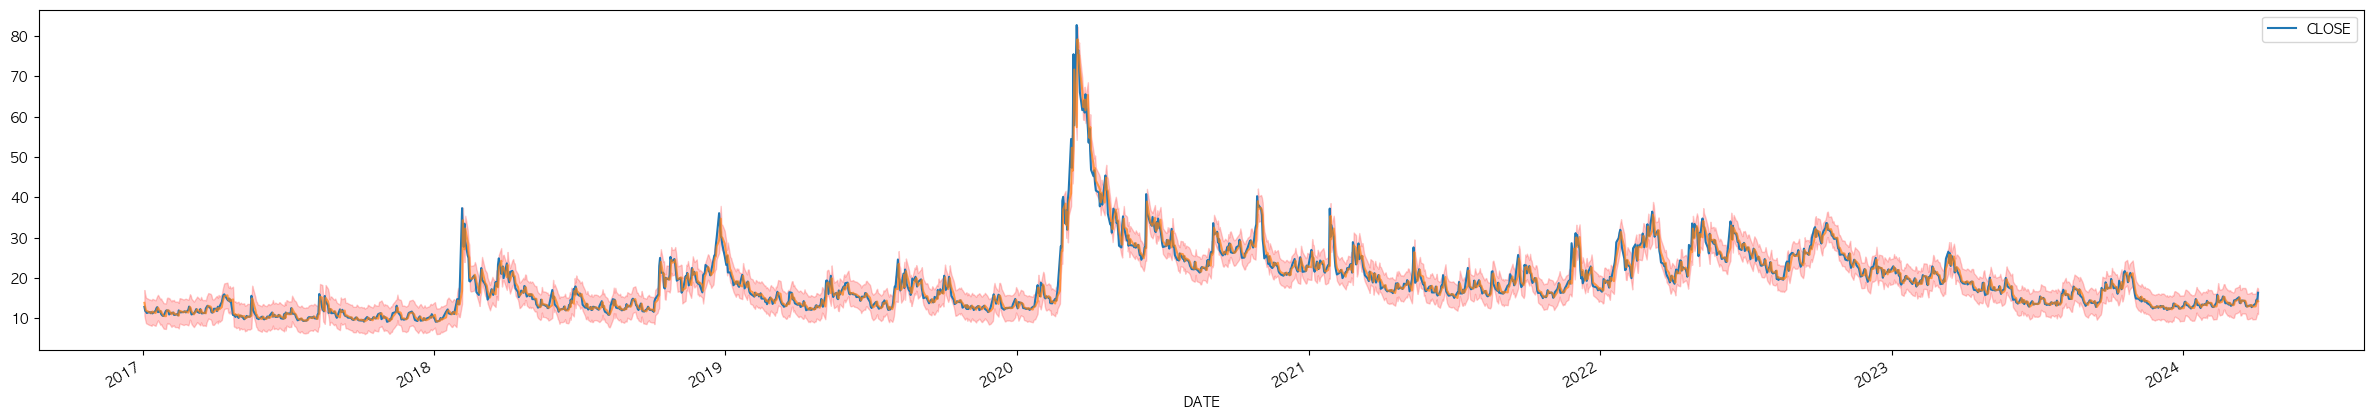

In [183]:
#################################################################################################################
#--------------- start=pd.to_datetime(        ) ----------------------------------------------------------------#
#--------------- 예측을 시작 및 종료하고 싶은 날짜를 빈칸에 입력함 ---------------------------------------------#
#--------------- ex) 2017-01-01 --------------------------------------------------------------------------------#
# pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), end=pd.to_datetime('2019-10-01'), dynamic=False)
#################################################################################################################

pred_ci = pred.conf_int()
pred_ci = pred_ci.loc['2017':]
# 그래프를 2015년 부터 그리겠다.
ax = df.loc['2017':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='red', alpha=.2)

# ax.set_xlabel('Date')
# ax.set_ylabel('M3')
# plt.legend()

# plt.rcParams["figure.figsize"] = (30, 5)
# plt.show()

In [184]:
df

,CLOSE
DATE,
1990-01-02,17.24
1990-01-03,18.19
1990-01-04,19.22
1990-01-05,20.11
1990-01-08,20.26
...,...
2024-03-28,13.01
2024-04-01,13.65
2024-04-02,14.61


In [185]:
y_real = df['2017':]
y_real

,CLOSE
DATE,
2017-01-03,12.85
2017-01-04,11.85
2017-01-05,11.67
2017-01-06,11.32
2017-01-09,11.56
...,...
2024-03-28,13.01
2024-04-01,13.65
2024-04-02,14.61


In [186]:
pred_ci

,lower CLOSE,upper CLOSE
DATE,,
2017-01-03,10.688399,17.012169
2017-01-04,9.640137,15.963907
2017-01-05,8.795287,15.119057
2017-01-06,8.694572,15.018342
2017-01-09,8.369898,14.693662
...,...,...
2024-03-28,9.743595,16.066239
2024-04-01,9.804700,16.127343
2024-04-02,10.497437,16.820081


In [187]:
y_pred = pred.predicted_mean
y_pred

DATE
2017-01-03    13.850284
2017-01-04    12.802022
2017-01-05    11.957172
2017-01-06    11.856457
2017-01-09    11.531780
                ...    
2024-03-28    12.904917
2024-04-01    12.966022
2024-04-02    13.658759
2024-04-03    14.443131
2024-04-04    14.221719
Name: predicted_mean, Length: 1839, dtype: float64

In [188]:
y_real['pred'] = pred.predicted_mean

In [191]:
y_real

,CLOSE,pred
DATE,,
2017-01-03,12.85,13.850284
2017-01-04,11.85,12.802022
2017-01-05,11.67,11.957172
2017-01-06,11.32,11.856457
2017-01-09,11.56,11.531780
...,...,...
2024-03-28,13.01,12.904917
2024-04-01,13.65,12.966022
2024-04-02,14.61,13.658759


In [189]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [195]:
r2_score(y_real['CLOSE'], y_real['pred'])

0.9410283082962299

In [196]:
mean_absolute_error(y_real['CLOSE'], y_real['pred'])

1.1120775979714885

In [198]:
np.sqrt(mean_squared_error(y_real['CLOSE'], y_real['pred']))

1.9512933123008482

In [199]:
results.params

ar.L1       0.592597
ma.L1      -0.721491
ar.S.L12   -0.001802
ma.S.L12   -1.000628
sigma2      2.596116
dtype: float64

In [200]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [201]:
df

,CLOSE
DATE,
1990-01-02,17.24
1990-01-03,18.19
1990-01-04,19.22
1990-01-05,20.11
1990-01-08,20.26
...,...
2024-03-28,13.01
2024-04-01,13.65
2024-04-02,14.61


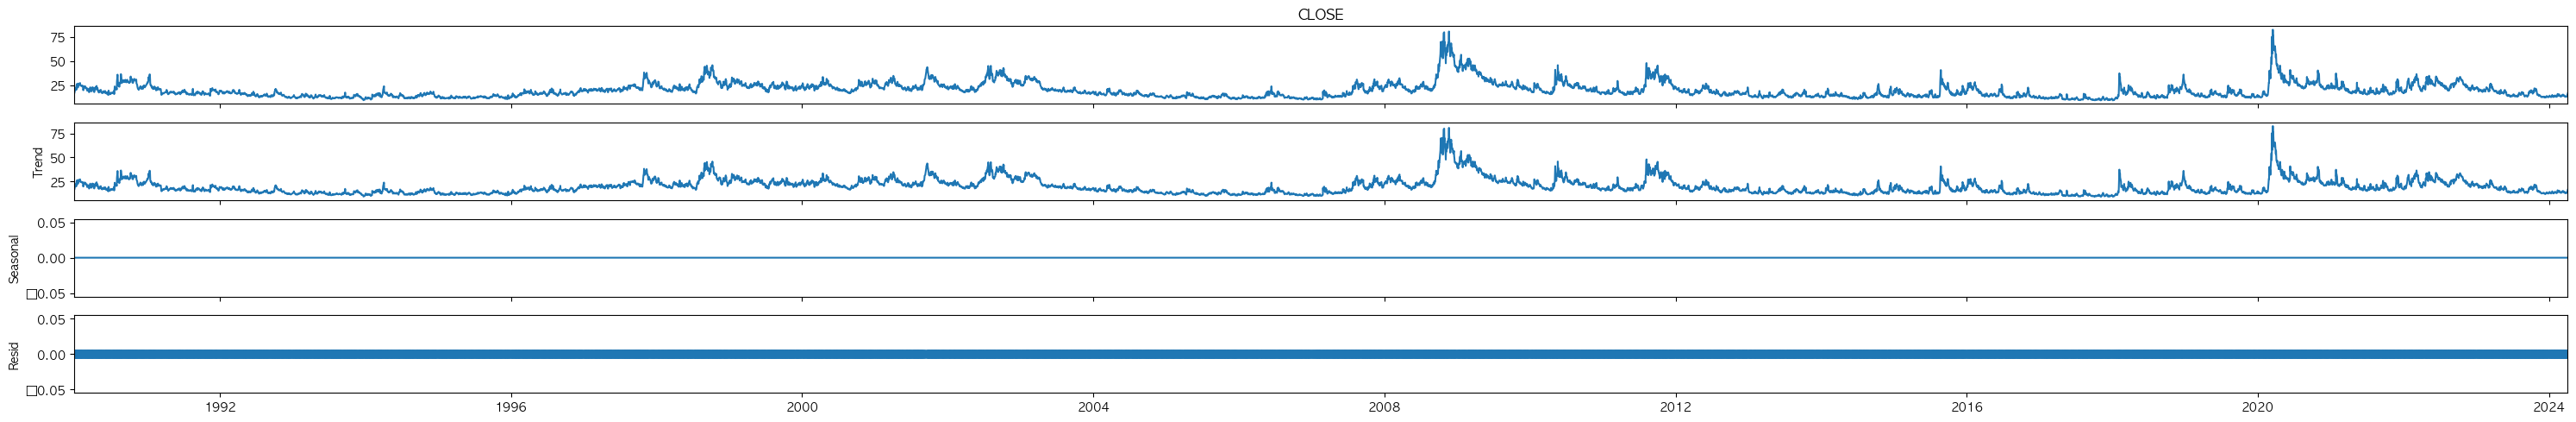

In [209]:
result = seasonal_decompose(df['CLOSE'], model='additive', period=1)
result.plot()
plt.show()

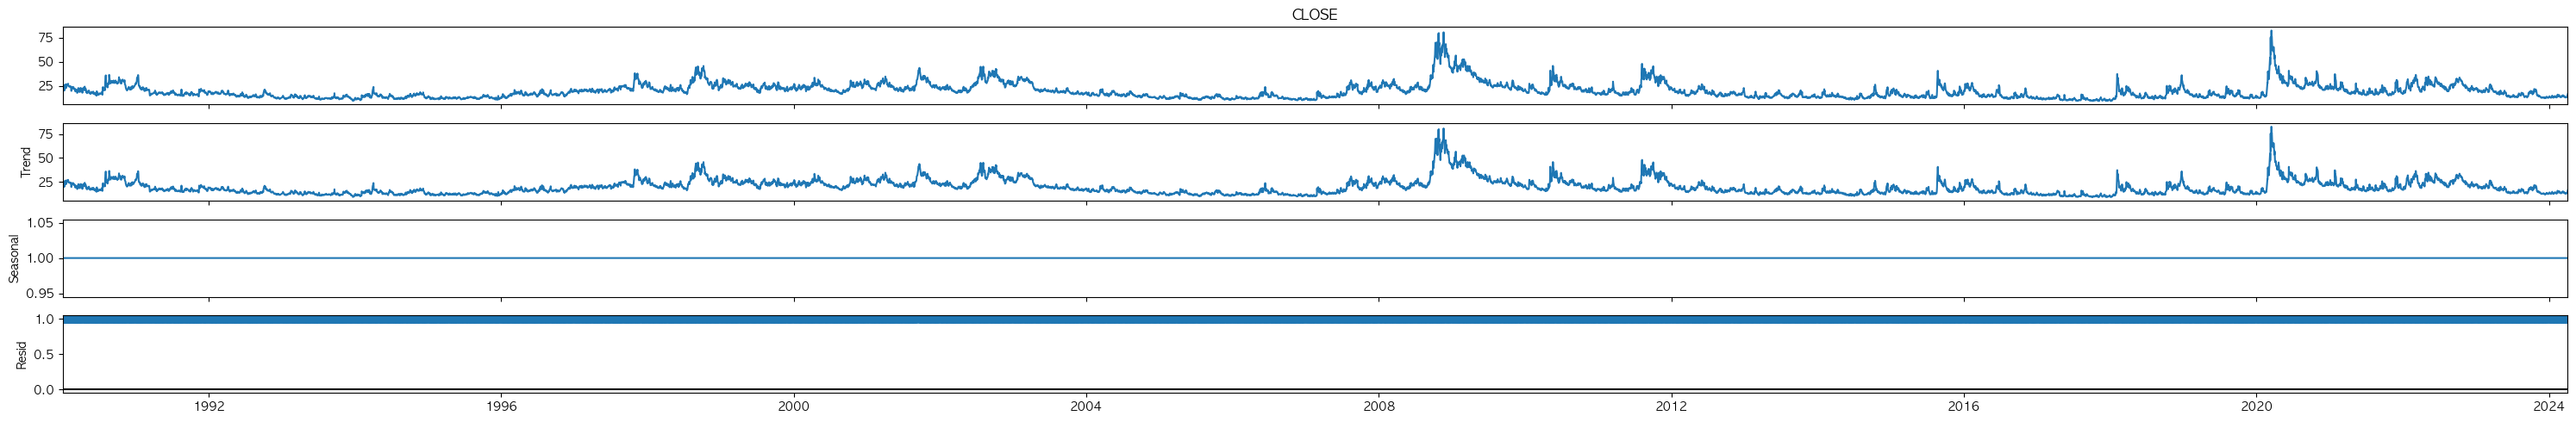

In [210]:
res = seasonal_decompose(df['CLOSE'], model='multiplicative', period=1)
res.plot()
plt.show()

In [130]:
adfuller(df['M3'].diff().dropna())

(-5.432506572315509,
 2.8934558626446722e-06,
 5,
 75,
 {'1%': -3.520713130074074,
  '5%': -2.9009249540740742,
  '10%': -2.5877813777777776},
 713.8462599811597)

In [129]:
df['M3'].diff().dropna()

Date
2012-02-01    10.0
2012-03-01   -29.0
2012-04-01     1.0
2012-05-01     2.0
2012-06-01    -4.0
              ... 
2018-06-01   -83.0
2018-07-01   -22.0
2018-08-01   -98.0
2018-09-01    51.0
2018-10-01   -12.0
Name: M3, Length: 81, dtype: float64

In [136]:
df.rolling(window=6).mean()

,M3
Date,
2012-01-01,NaN
2012-02-01,NaN
2012-03-01,NaN
2012-04-01,NaN
2012-05-01,NaN
...,...
2018-06-01,230.833333
2018-07-01,255.833333
2018-08-01,254.333333


In [137]:
df.rolling(window=6).std()

,M3
Date,
2012-01-01,NaN
2012-02-01,NaN
2012-03-01,NaN
2012-04-01,NaN
2012-05-01,NaN
...,...
2018-06-01,103.455143
2018-07-01,94.249492
2018-08-01,95.399511


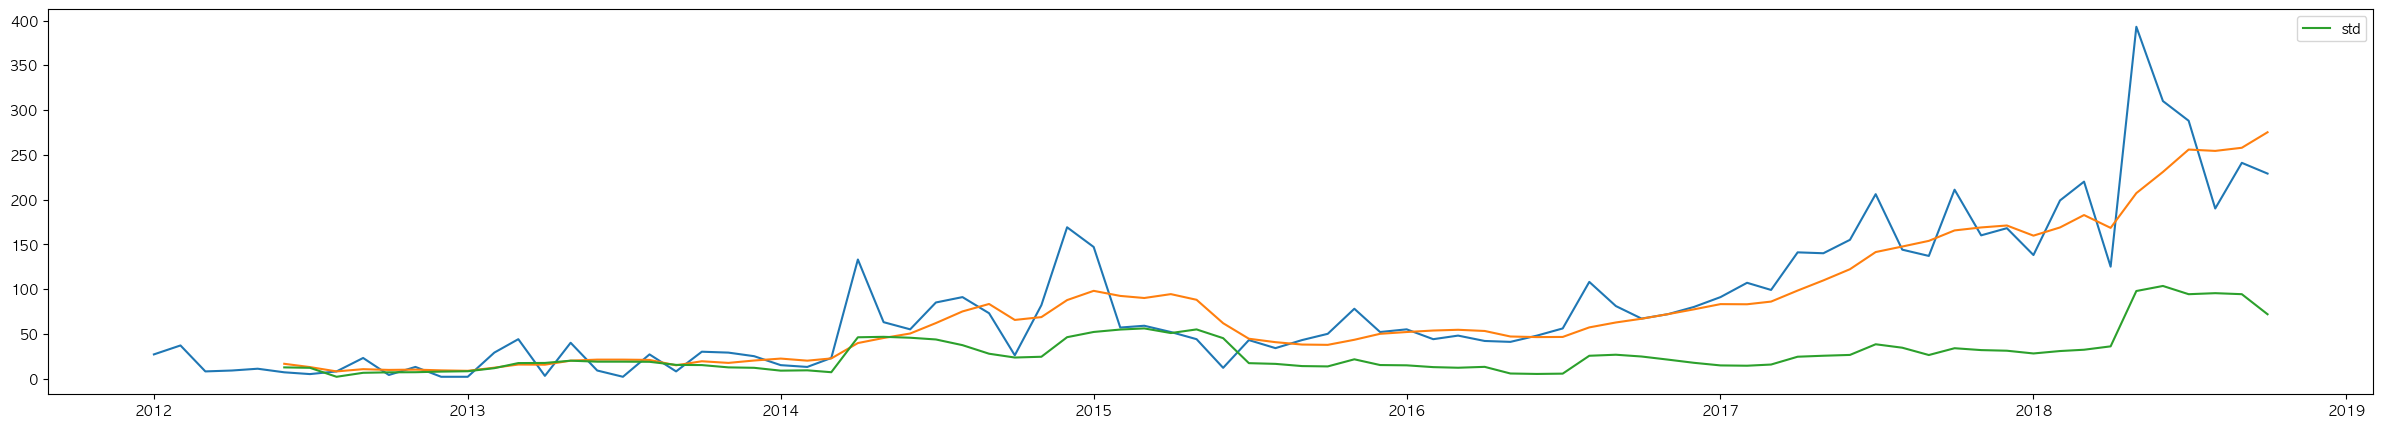

In [146]:
plt.plot(df)
plt.plot(df.rolling(window=6).mean())
plt.plot(df.rolling(window=6).std(), label='std')
plt.legend()
plt.show()

In [145]:
df.rolling(window=6).std()

,M3
Date,
2012-01-01,NaN
2012-02-01,NaN
2012-03-01,NaN
2012-04-01,NaN
2012-05-01,NaN
...,...
2018-06-01,103.455143
2018-07-01,94.249492
2018-08-01,95.399511


In [149]:
adfuller(df.diff().dropna())

(-5.432506572315509,
 2.8934558626446722e-06,
 5,
 75,
 {'1%': -3.520713130074074,
  '5%': -2.9009249540740742,
  '10%': -2.5877813777777776},
 713.8462599811597)

In [211]:
from statsmodels.tsa.stattools import acf, pacf

In [212]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [213]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

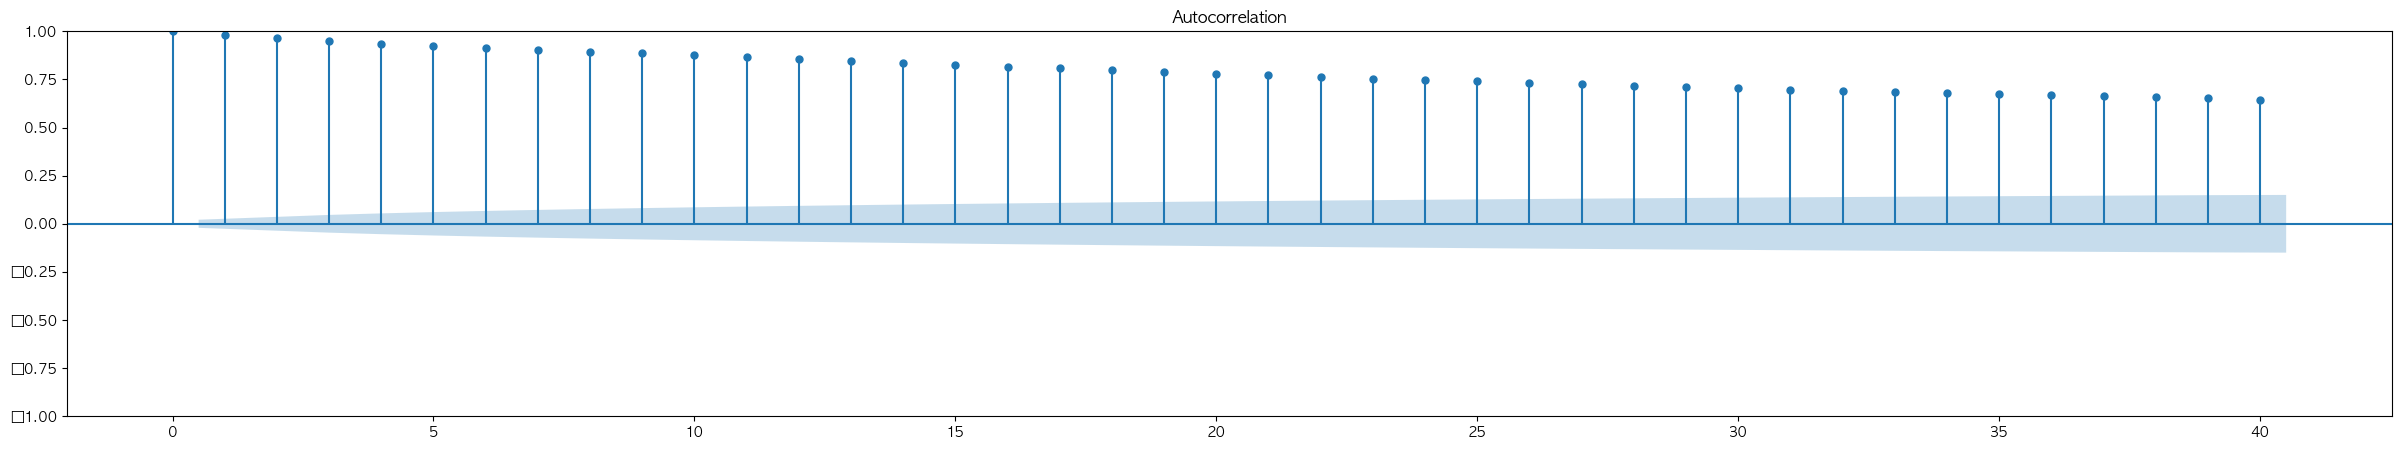

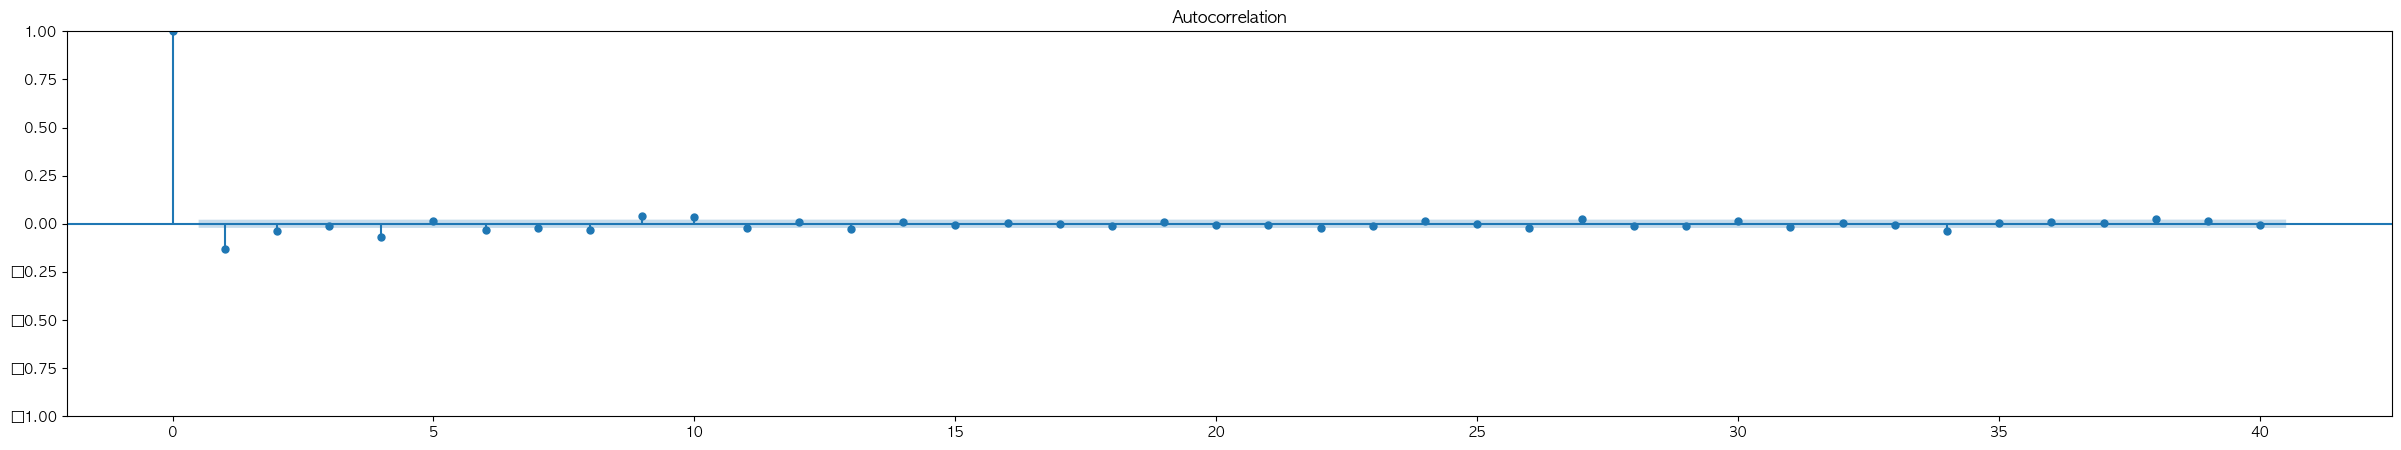

In [214]:
plot_acf(df)
plt.show()

plot_acf(df_d1)
plt.show()



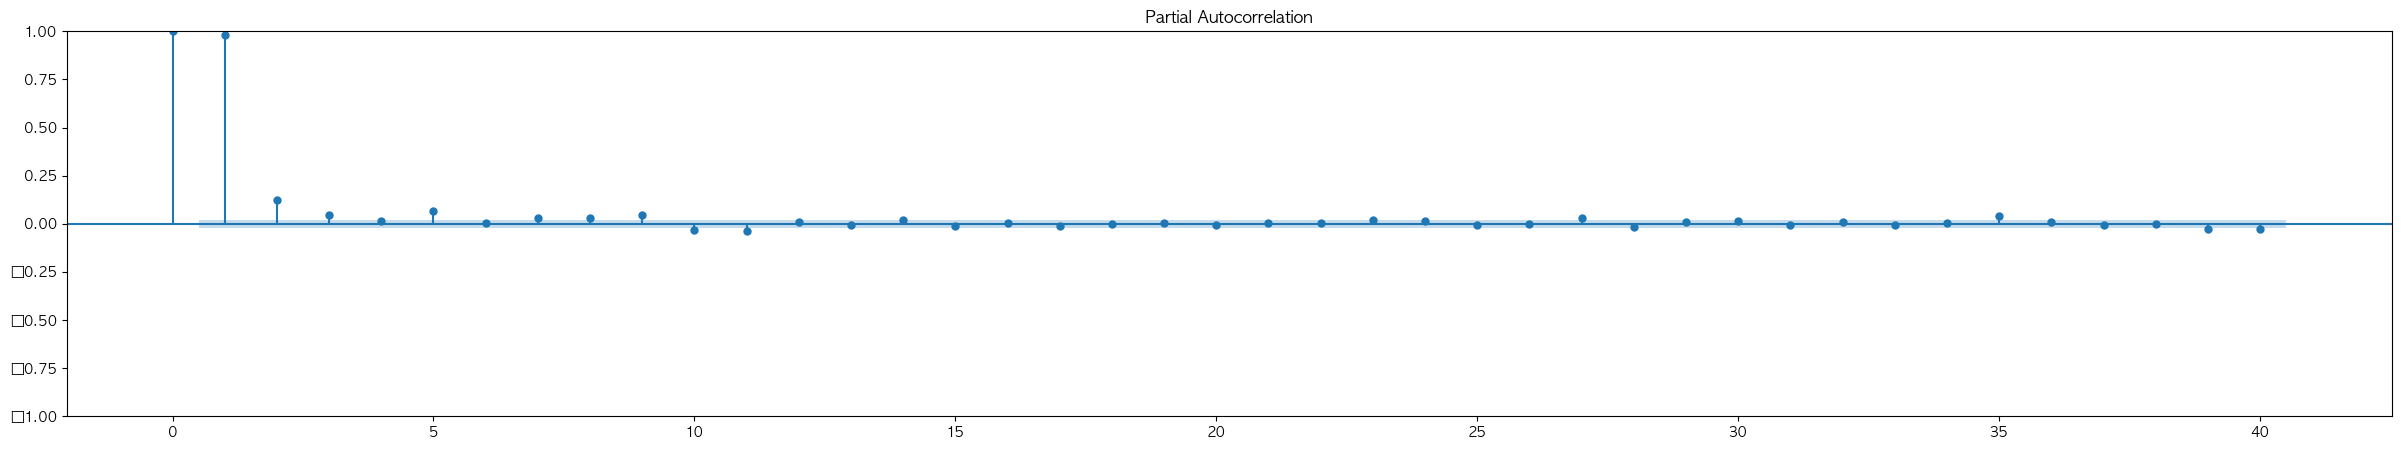

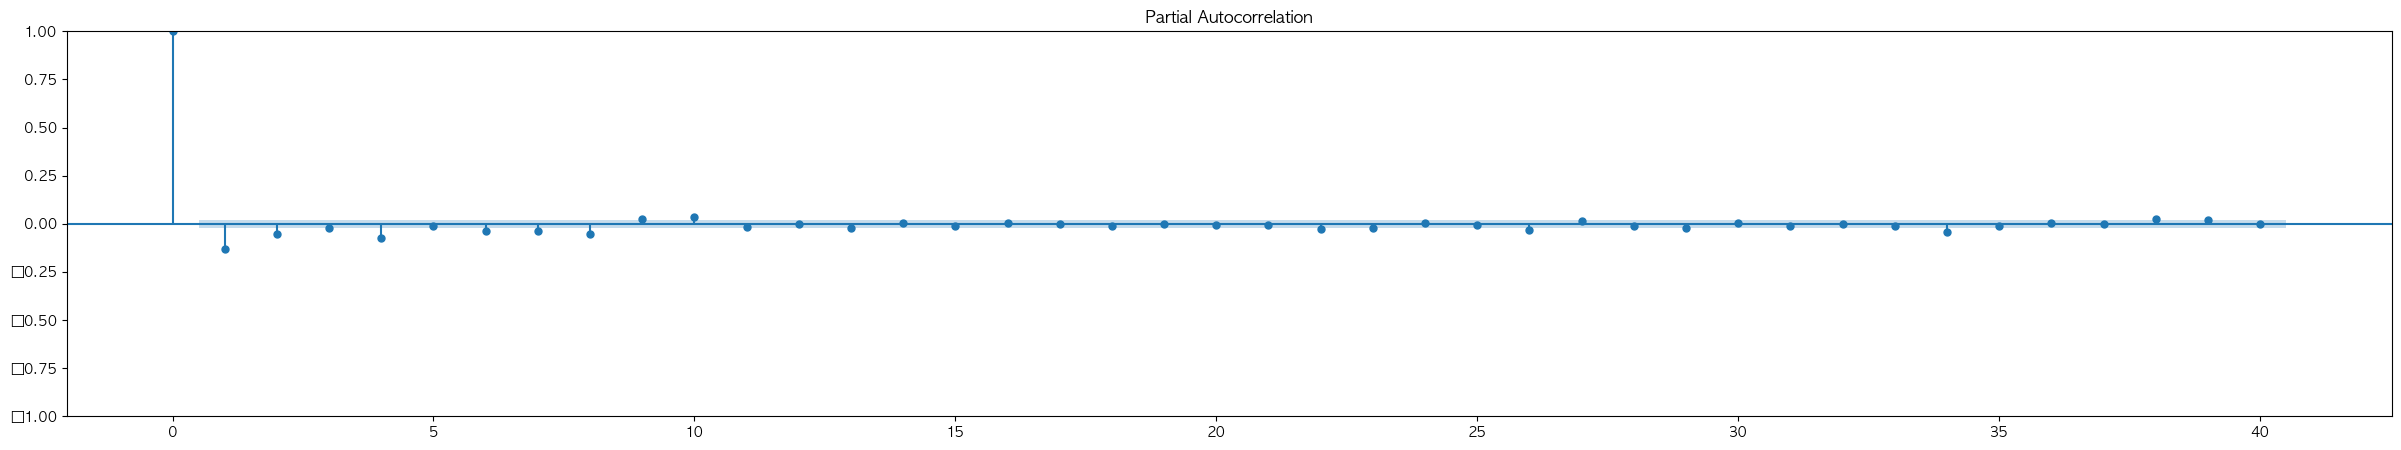

In [215]:
plot_pacf(df)
plt.show()

plot_pacf(df_d1)
plt.show()

In [ ]:
#   candidate (2,1,1 )

In [216]:
from statsmodels.tsa.arima.model import ARIMA

0.9582687706933524


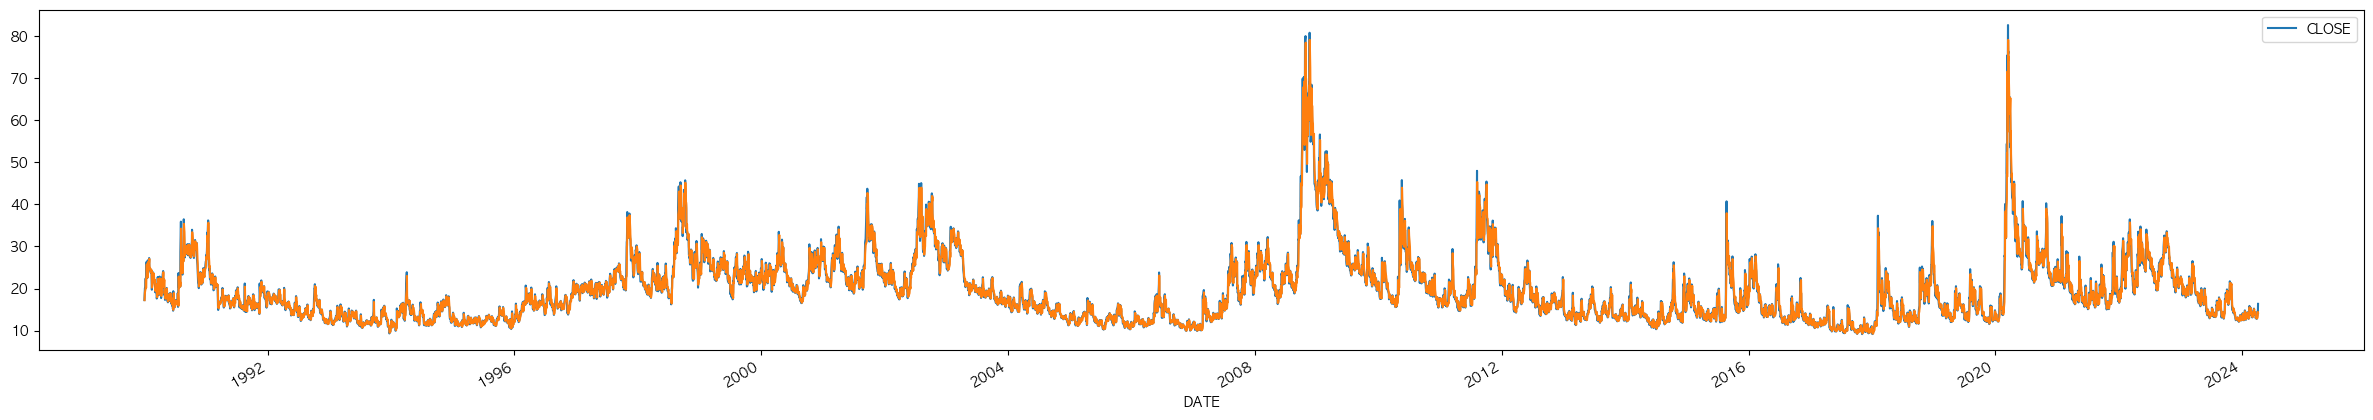

In [223]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# ARIMA 모델 생성
model1_fit = ARIMA(df, order=(1, 1, 1))
model1_fit = model1_fit.fit()

# 예측을 시작할 인덱스 설정
start_idx = df.index[1]

# 모델을 사용하여 예측 수행
forecast1 = model1_fit.predict(start=start_idx)
df.plot()
forecast1.plot()
print(r2_score(df.iloc[1:,:], forecast1))



In [220]:
# ▶ 모든 조합의 Parameter 모델 생성 후 AIC로 모델 성능 파악 (※ AIC가 작을수록 최적의 모델일 확률이 높다)
# ▶ 1년 단위 데이터이기 때문에 주기가 12
import statsmodels.api as sm
import numpy as np
np.random.seed(1234)
warnings.filterwarnings("ignore") # specify to ignore warning messages



p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
import itertools
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq= [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Generate all different combinations of p, q and q triplets
import itertools
pdq = list(itertools.product(p, d, q))
cols = ['param','param_seasonal','aic']
lst = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            lst.append([param, param_seasonal, results.aic])
            df1 = pd.DataFrame(lst, columns=cols)
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.46639D+00    |proj g|=  1.79359D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.794D-06   4.466D+00
  F =   4.4663869461289210     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:77181.16642910775
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.11830D+00    |proj g|=  1.13817D-01

At iterate   10    f=  3.90341D+00    |proj g|=  2.44539D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     23      1     0     0   1.750D-05   3.903D+00
  F =   3.9034070041360733     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:67454.87303147135
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86078D+00    |proj g|=  2.77642D-04

           * *

 This problem is unconstrained.


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:49436.25816907322
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.84765D+00    |proj g|=  5.17104D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      1     0     0   3.475D-07   2.846D+00
  F =   2.8458253073998763     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:49179.86131186986
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85589D+00    |proj g|=  1.24324D-04


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     14      1     0     0   1.243D-04   2.856D+00
  F =   2.8558934967836218     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:49353.83962442099
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85533D+00    |proj g|=  4.42518D-01


 This problem is unconstrained.



At iterate    5    f=  2.84857D+00    |proj g|=  2.97767D-01

At iterate   10    f=  2.84601D+00    |proj g|=  1.66176D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     16      1     0     0   1.776D-05   2.846D+00
  F =   2.8460024474817605     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:49184.92229248482
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.84874D+00    |proj g|=  5.07816D-06

           * *

 This problem is unconstrained.


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:49230.23661461835
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.85066D+00    |proj g|=  9.36619D-02


 This problem is unconstrained.



At iterate    5    f=  2.83760D+00    |proj g|=  1.73344D-01

At iterate   10    f=  2.82088D+00    |proj g|=  1.34231D-02

At iterate   15    f=  2.82030D+00    |proj g|=  8.75412D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     28      1     0     0   2.951D-06   2.820D+00
  F =   2.8203034336566777     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:48740.84333358739
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   10    f=  3.83415D+00    |proj g|=  4.08413D-01

At iterate   15    f=  3.82777D+00    |proj g|=  7.12560D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     23      1     0     0   3.720D-06   3.828D+00
  F =   3.8277692551559168     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:66147.85272909424
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.01746D+00    |proj g|=  4.46376D-02


 This problem is unconstrained.



At iterate    5    f=  3.96822D+00    |proj g|=  3.79391D-01

At iterate   10    f=  3.39440D+00    |proj g|=  8.92262D-01

At iterate   15    f=  3.34059D+00    |proj g|=  2.84540D-01

At iterate   20    f=  3.33327D+00    |proj g|=  1.52053D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     41      1     0     0   4.161D-07   3.333D+00
  F =   3.3332705043650850     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:57604.914315428665
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X

 This problem is unconstrained.



At iterate    5    f=  2.50947D+00    |proj g|=  2.82729D-02

At iterate   10    f=  2.50896D+00    |proj g|=  2.87903D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     13      1     0     0   2.879D-07   2.509D+00
  F =   2.5089610709062860     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:43358.84730526062
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.54794D+00    |proj g|=  2.32427D-01


 This problem is unconstrained.



At iterate    5    f=  2.46923D+00    |proj g|=  6.44657D-02

At iterate   10    f=  2.46659D+00    |proj g|=  2.25020D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   2.250D-07   2.467D+00
  F =   2.4665855220504733     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:42628.59782103218
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97013D+00    |proj g|=  4.64635D-02


 This problem is unconstrained.



At iterate    5    f=  3.71188D+00    |proj g|=  1.62794D-01

At iterate   10    f=  2.59227D+00    |proj g|=  9.31284D-01

At iterate   15    f=  2.50222D+00    |proj g|=  7.49587D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     64      2     0     0   1.764D-05   2.502D+00
  F =   2.5022181435786228     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:43244.3295210386


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.96839D+00    |proj g|=  4.65377D-02

At iterate    5    f=  3.57958D+00    |proj g|=  9.78525D-01

At iterate   10    f=  2.67758D+00    |proj g|=  5.12433D-01

At iterate   15    f=  2.46682D+00    |proj g|=  7.27134D-02

At iterate   20    f=  2.46660D+00    |proj g|=  2.84793D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     46      1     0     0   2.848D-05   2.467D+00
  F =   2.4665974221527995     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  2.48291D+00    |proj g|=  1.03083D-01

At iterate   10    f=  2.47773D+00    |proj g|=  5.70610D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   5.706D-07   2.478D+00
  F =   2.4777316801296569     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:42821.203432640476
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.54984D+00    |proj g|=  2.35893D-01


 This problem is unconstrained.



At iterate    5    f=  2.46873D+00    |proj g|=  6.74325D-02

At iterate   10    f=  2.44937D+00    |proj g|=  1.11080D-01

At iterate   15    f=  2.44552D+00    |proj g|=  5.81336D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     24      1     0     0   1.215D-06   2.446D+00
  F =   2.4455246074366936     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:42266.665216506066
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90600D+00    |proj g|=  2.91303D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   5.516D-08   1.906D+00
  F =   1.9059984905705458     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:32939.65391705903
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variable

 This problem is unconstrained.


ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:38858.89541840101
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97300D+00    |proj g|=  2.48131D-01


 This problem is unconstrained.



At iterate    5    f=  1.90752D+00    |proj g|=  2.92342D-03

At iterate   10    f=  1.90751D+00    |proj g|=  6.55838D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     15      1     0     0   6.558D-06   1.908D+00
  F =   1.9075135188343841     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:32965.83360545816
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90623D+00    |proj g|=  5.00020D-06

           * *

 This problem is unconstrained.


ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:32943.71556670496
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90599D+00    |proj g|=  4.36462D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      8      1     0     0   1.941D-05   1.906D+00
  F =   1.9059813708944282     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:32941.35808905572
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.10045D+00    |proj g|=  6.39968D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explore

 This problem is unconstrained.


ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:36299.85063512665
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.98232D+00    |proj g|=  2.33911D-01


 This problem is unconstrained.



At iterate    5    f=  1.90811D+00    |proj g|=  6.66991D-02

At iterate   10    f=  1.90746D+00    |proj g|=  1.12718D-02

At iterate   15    f=  1.90746D+00    |proj g|=  7.97865D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     24      1     0     0   2.822D-05   1.907D+00
  F =   1.9074615681242584     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:32966.935897187184
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.


ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:32819.55231555262
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89587D+00    |proj g|=  5.36291D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   1.561D-06   1.896D+00
  F =   1.8958535998053310     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:32766.35020463612
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24156D+00    |proj g|=  6.70349D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   2.268D-05   2.242D+00
  F =   2.2415354761213111     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:38737.733027376256
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.02571D+00    |proj g|=  1.86291D-01


 This problem is unconstrained.



At iterate    5    f=  1.89760D+00    |proj g|=  7.06699D-03

At iterate   10    f=  1.89757D+00    |proj g|=  4.88864D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     19      1     0     0   2.325D-06   1.898D+00
  F =   1.8975730322107955     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:32796.06199660255
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89663D+00    |proj g|=  5.80167D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   1.026D-05   1.897D+00
  F =   1.8965949718810420     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:32779.161114104405
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89589D+00    |proj g|=  5.36059D-03


 This problem is unconstrained.



At iterate    5    f=  1.89587D+00    |proj g|=  5.99782D-04

At iterate   10    f=  1.89585D+00    |proj g|=  5.33544D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     16      1     0     0   5.443D-06   1.896D+00
  F =   1.8958535553291513     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:32768.34943608774
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11224D+00    |proj g|=  1.10802D-01


 This problem is unconstrained.



At iterate    5    f=  2.09273D+00    |proj g|=  2.06318D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   1.426D-06   2.093D+00
  F =   2.0927329344329046     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:36168.42510700059
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.03167D+00    |proj g|=  1.81203D-01


 This problem is unconstrained.



At iterate    5    f=  1.89882D+00    |proj g|=  1.77124D-01

At iterate   10    f=  1.89749D+00    |proj g|=  5.27297D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     23      1     0     0   8.453D-06   1.897D+00
  F =   1.8974879032103791     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:32796.59096747535
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90835D+00    |proj g|=  8.33794D-04


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     15      1     0     0   8.338D-04   1.908D+00
  F =   1.9083547529715150     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:32980.37013134778


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.31225D+00    |proj g|=  2.19389D+00

At iterate    5    f=  1.91355D+00    |proj g|=  1.33604D-01

At iterate   10    f=  1.90545D+00    |proj g|=  3.24585D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     13      1     0     0   1.060D-06   1.905D+00
  F =   1.9054523785616826     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:32932.21710154587
RUNNING THE L-B

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      9      1     0     0   1.787D-05   2.211D+00
  F =   2.2108215835785670     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:38206.99696423764
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11748D+00    |proj g|=  2.93399D-01


 This problem is unconstrained.



At iterate    5    f=  1.92454D+00    |proj g|=  5.28689D-01

At iterate   10    f=  1.90236D+00    |proj g|=  1.76504D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     18      1     0     0   4.995D-05   1.902D+00
  F =   1.9023582397829695     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:32878.75038344971
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37606D+00    |proj g|=  9.69973D-01


 This problem is unconstrained.



At iterate    5    f=  1.96621D+00    |proj g|=  4.39950D-01

At iterate   10    f=  1.90807D+00    |proj g|=  2.10910D-01

At iterate   15    f=  1.90545D+00    |proj g|=  5.86428D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     19      1     0     0   1.992D-06   1.905D+00
  F =   1.9054500078563916     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:32932.17613575845
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  1.91668D+00    |proj g|=  8.36059D-01

At iterate   10    f=  1.90977D+00    |proj g|=  2.56748D-01

At iterate   15    f=  1.90596D+00    |proj g|=  1.02102D-03

At iterate   20    f=  1.90595D+00    |proj g|=  2.05073D-02

At iterate   25    f=  1.90564D+00    |proj g|=  1.43209D-01

At iterate   30    f=  1.90544D+00    |proj g|=  5.98041D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     43      1     0     0   8.310D-07   1.905D+00
  F =   1.9054365168232961     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:32933.94301070

 This problem is unconstrained.



At iterate    5    f=  2.07538D+00    |proj g|=  2.01875D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   6.375D-07   2.075D+00
  F =   2.0753727760902336     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:35868.44157083923
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11951D+00    |proj g|=  2.80414D-01


 This problem is unconstrained.



At iterate    5    f=  1.93743D+00    |proj g|=  4.28454D-01

At iterate   10    f=  1.90490D+00    |proj g|=  8.07860D-02

At iterate   15    f=  1.90249D+00    |proj g|=  2.57224D-03
  ys=-8.312E-06  -gs= 1.755E-05 BFGS update SKIPPED

At iterate   20    f=  1.90231D+00    |proj g|=  4.04794D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     36      1     1     0   7.414D-06   1.902D+00
  F =   1.9023111540012863     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:32879.93674114223
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.2

 This problem is unconstrained.


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:32815.38959916764
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30795D+00    |proj g|=  2.21584D+00


 This problem is unconstrained.



At iterate    5    f=  1.90939D+00    |proj g|=  2.04027D-01

At iterate   10    f=  1.89623D+00    |proj g|=  2.70813D-02

At iterate   15    f=  1.89584D+00    |proj g|=  2.83013D-03

At iterate   20    f=  1.89584D+00    |proj g|=  2.79023D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     22      1     0     0   2.790D-06   1.896D+00
  F =   1.8958417954855584     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:32768.14622599045
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   1.201D-05   2.210D+00
  F =   2.2098711234012502     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:38192.57301237361
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11588D+00    |proj g|=  2.96192D-01


 This problem is unconstrained.



At iterate    5    f=  1.89881D+00    |proj g|=  2.26768D-01

At iterate   10    f=  1.89399D+00    |proj g|=  3.51959D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     22      1     0     0   1.950D-05   1.894D+00
  F =   1.8939939095249254     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:32736.21475659071
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37238D+00    |proj g|=  9.75640D-01


 This problem is unconstrained.



At iterate    5    f=  1.98376D+00    |proj g|=  2.36164D-01

At iterate   10    f=  1.90062D+00    |proj g|=  3.68710D-01

At iterate   15    f=  1.89639D+00    |proj g|=  8.28260D-02

At iterate   20    f=  1.89604D+00    |proj g|=  8.95981D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     24      1     0     0   8.960D-06   1.896D+00
  F =   1.8960356403174059     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:32771.49586468477
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  1.91493D+00    |proj g|=  1.73731D+00

At iterate   10    f=  1.90129D+00    |proj g|=  3.59684D-01

At iterate   15    f=  1.89641D+00    |proj g|=  1.25363D-02

At iterate   20    f=  1.89639D+00    |proj g|=  9.56032D-04

At iterate   25    f=  1.89639D+00    |proj g|=  1.18742D-02

At iterate   30    f=  1.89621D+00    |proj g|=  1.28908D-01

At iterate   35    f=  1.89584D+00    |proj g|=  1.84782D-03

At iterate   40    f=  1.89583D+00    |proj g|=  1.55923D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     55      1     0     0   9.239D-05   1.896D+00
  F =   1.89583207962

 This problem is unconstrained.



At iterate    5    f=  2.07280D+00    |proj g|=  2.54519D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     11      1     0     0   5.484D-06   2.073D+00
  F =   2.0727049222783642     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:35824.34105697014
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11788D+00    |proj g|=  2.83307D-01


 This problem is unconstrained.



At iterate    5    f=  1.94213D+00    |proj g|=  2.63558D-01

At iterate   10    f=  1.89464D+00    |proj g|=  3.55136D-02

At iterate   15    f=  1.89396D+00    |proj g|=  1.02124D-02

At iterate   20    f=  1.89395D+00    |proj g|=  5.31567D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     32      1     0     0   8.160D-06   1.894D+00
  F =   1.8939538540924716     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:32737.52259871791
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89731D+00    |proj g|=  3.30487D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   3.416D-06   1.897D+00
  F =   1.8973087190996318     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:32791.49466604164
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24279D+00    |proj g|=  5.00693D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explore

 This problem is unconstrained.


ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:38759.45935058402
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.02693D+00    |proj g|=  1.86224D-01


 This problem is unconstrained.



At iterate    5    f=  1.89900D+00    |proj g|=  1.47102D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     17      1     0     0   1.335D-05   1.899D+00
  F =   1.8988441774520015     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:32818.02738637059
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89733D+00    |proj g|=  6.14935D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   3.879D-06   1.897D+00
  F =   1.8973084571102774     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:32791.49013886559
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89731D+00    |proj g|=  2.04562D-03


 This problem is unconstrained.



At iterate    5    f=  1.89730D+00    |proj g|=  3.01435D-04

At iterate   10    f=  1.89730D+00    |proj g|=  5.81938D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   5.952D-06   1.897D+00
  F =   1.8973018485110444     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:32793.375942270846
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.11277D+00    |proj g|=  1.10950D-01


 This problem is unconstrained.



At iterate    5    f=  2.09315D+00    |proj g|=  1.17764D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   1.944D-07   2.093D+00
  F =   2.0931549865230386     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:36175.71816711811
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.03292D+00    |proj g|=  1.81121D-01


 This problem is unconstrained.



At iterate    5    f=  1.90013D+00    |proj g|=  1.76600D-01

At iterate   10    f=  1.89876D+00    |proj g|=  3.34965D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     29      1     0     0   4.736D-05   1.899D+00
  F =   1.8987644934210228     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:32818.650446315274
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89745D+00    |proj g|=  1.16435D-02

At iterate   

 This problem is unconstrained.



At iterate   10    f=  1.89601D+00    |proj g|=  1.83786D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   1.412D-05   1.896D+00
  F =   1.8960148765486582     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:32769.13706676081
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89426D+00    |proj g|=  1.09552D-02


 This problem is unconstrained.



At iterate    5    f=  1.89401D+00    |proj g|=  1.61779D-02

At iterate   10    f=  1.89287D+00    |proj g|=  3.21426D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     15      1     0     0   4.665D-06   1.893D+00
  F =   1.8928686498217588     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:32716.770268919994
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.23740D+00    |proj g|=  2.00168D-02


 This problem is unconstrained.



At iterate    5    f=  2.21119D+00    |proj g|=  2.98721D-01

At iterate   10    f=  2.21073D+00    |proj g|=  5.19277D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     32      1     0     0   1.896D-04   2.211D+00
  F =   2.2107269334693496     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:38207.36141035036
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.02328D+00    |proj g|=  1.86812D-01


 This problem is unconstrained.



At iterate    5    f=  1.89640D+00    |proj g|=  1.12801D-01

At iterate   10    f=  1.89471D+00    |proj g|=  2.53134D-03

At iterate   15    f=  1.89459D+00    |proj g|=  4.56066D-03

At iterate   20    f=  1.89458D+00    |proj g|=  5.90805D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     30      1     0     0   5.125D-06   1.895D+00
  F =   1.8945839380578493     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:32746.410449639636
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X

 This problem is unconstrained.



At iterate    5    f=  1.89454D+00    |proj g|=  1.67686D-02

At iterate   10    f=  1.89341D+00    |proj g|=  6.52160D-03

At iterate   15    f=  1.89340D+00    |proj g|=  5.33071D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     21      1     0     0   5.331D-06   1.893D+00
  F =   1.8933974755689005     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:32725.9083778306
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  1.89402D+00    |proj g|=  1.70545D-02

At iterate   10    f=  1.89288D+00    |proj g|=  1.67861D-03

At iterate   15    f=  1.89288D+00    |proj g|=  6.42965D-04

At iterate   20    f=  1.89287D+00    |proj g|=  1.00717D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     24      1     0     0   7.896D-06   1.893D+00
  F =   1.8928683777799886     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:32718.765568038205
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X

 This problem is unconstrained.



At iterate    5    f=  2.09044D+00    |proj g|=  1.14293D-03

At iterate   10    f=  2.07918D+00    |proj g|=  3.73211D-01
  ys=-6.273E-02  -gs= 1.743E-04 BFGS update SKIPPED

At iterate   15    f=  2.07572D+00    |proj g|=  6.35904D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     39      1     1     0   3.344D-07   2.076D+00
  F =   2.0757133774583849     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:35876.32716248089
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0

 This problem is unconstrained.



At iterate    5    f=  1.89537D+00    |proj g|=  3.20322D-02

At iterate   10    f=  1.89470D+00    |proj g|=  2.91289D-03

At iterate   15    f=  1.89461D+00    |proj g|=  2.04702D-02

At iterate   20    f=  1.89456D+00    |proj g|=  1.56522D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     35      1     0     0   1.256D-05   1.895D+00
  F =   1.8945614181494412     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:32748.021305622344


In [221]:
df1

,param,param_seasonal,aic
0,"(0, 0, 0)","(0, 0, 0, 12)",77181.166429
1,"(0, 0, 0)","(0, 0, 1, 12)",67454.873031
2,"(0, 0, 0)","(0, 1, 0, 12)",49436.258169
3,"(0, 0, 0)","(0, 1, 1, 12)",49179.861312
4,"(0, 0, 0)","(1, 0, 0, 12)",49353.839624
...,...,...,...
59,"(1, 1, 1)","(0, 1, 1, 12)",32746.410450
60,"(1, 1, 1)","(1, 0, 0, 12)",32725.908378
61,"(1, 1, 1)","(1, 0, 1, 12)",32718.765568
62,"(1, 1, 1)","(1, 1, 0, 12)",35876.327162


In [222]:
# ▶ AIC가 최소가 되는 parameter 조합
aic_min=df1['aic'].min()
optimal_para=df1.loc[df1['aic']==aic_min]
optimal_para

,param,param_seasonal,aic
57,"(1, 1, 1)","(0, 0, 1, 12)",32716.770269


In [224]:
# ▶ Best score 기준 모델 학습
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1,1,1),
                                seasonal_order=(1,1,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.02937D+00    |proj g|=  1.81593D-01

At iterate    5    f=  1.89537D+00    |proj g|=  3.20322D-02

At iterate   10    f=  1.89470D+00    |proj g|=  2.91289D-03

At iterate   15    f=  1.89461D+00    |proj g|=  2.04702D-02

At iterate   20    f=  1.89456D+00    |proj g|=  1.56522D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     35      1     0     0   1.256D-05   1.895D+00
  F =   1.8945614181494412     

CONVERG